In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("C:\\Users\\ASUS\\project3-2\\mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("C:\\Users\\ASUS\\project3-2\\mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
images = train.iloc[0:60000,1:]
labels = train.iloc[0:60000,:1]

In [5]:
test_images = test.iloc[0:5000,1:]
test_labels = test.iloc[0:5000,:1]

In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(images, labels,
test_size=0.1, random_state=84)

In [7]:
kVals = range(1, 9, 2)
accuracies = []

In [8]:
# loop over various values of `k` for the k-Nearest Neighbor classifier
import timeit
import time
for k in range(1, 9, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          start=time.clock()
          model.fit(trainData, trainLabels)
          end=time.clock()
          k_cpu_time=end-start
          print("CPU calculating time:",k_cpu_time)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
            
            # find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100)) 

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


CPU calculating time: 33.92004444156208
k=1, accuracy=97.48%


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


CPU calculating time: 33.32690375659763
k=3, accuracy=97.62%


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


CPU calculating time: 32.34677502852992
k=5, accuracy=97.28%


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


CPU calculating time: 30.8938721616737
k=7, accuracy=97.10%
k=3 achieved highest accuracy of 97.62% on validation data


In [13]:
from sklearn.metrics import accuracy_score

clf_knn = KNeighborsClassifier(n_neighbors=3)
start=time.clock()
clf_knn.fit(trainData, trainLabels)
end=time.clock()
knn_cpu_time=end-start
y_pred_knn = clf_knn.predict(valData)
acc_knn = accuracy_score(valLabels, y_pred_knn)

#test data
knn_test_data_prediction = clf_knn.predict(test_images)
knn_test_data_acc = accuracy_score(test_labels, knn_test_data_prediction)
print("Test data accuracy:",knn_test_data_acc)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Test data accuracy: 0.9554


In [14]:
val_error=(1-acc_knn)
print("Validation error:",val_error)
test_error=(1-knn_test_data_acc)
print("Test data error:",test_error)

Validation error: 0.023833333333333373
Test data error: 0.04459999999999997


[[459   0   1   0   0   0   0   0   0   0]
 [  0 569   2   0   0   0   0   0   0   0]
 [  4   6 507   3   0   0   0  10   0   0]
 [  0   1   1 480   1   9   0   6   0   2]
 [  1   2   0   0 473   0   4   0   0  20]
 [  3   0   0  12   2 429   2   1   3   4]
 [  5   3   0   0   2   3 449   0   0   0]
 [  0  19   1   0   1   0   0 485   0   6]
 [  8   1   6  12   6   7   3   4 440   2]
 [  1   6   2   6   9   1   1   6   2 486]]


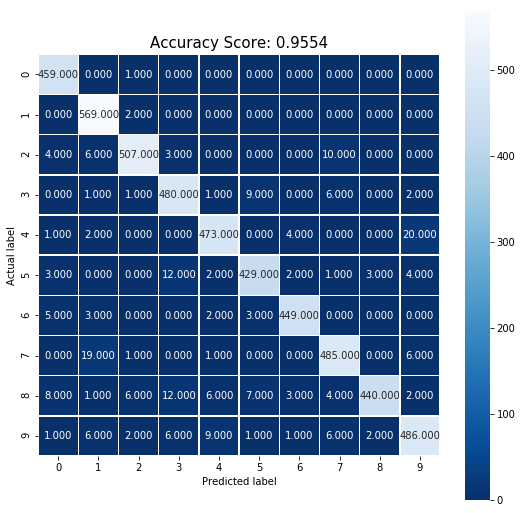

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, knn_test_data_prediction)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_test_data_acc)
plt.title(all_sample_title, size = 15);